In [105]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras

In [76]:
df=pd.read_csv('nasa.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [78]:
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [79]:
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

In [80]:
df['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [81]:
encoder = LabelEncoder()

df['Hazardous'] = encoder.fit_transform(df.Hazardous)
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)

In [82]:
df_1=df.iloc[:,:-1]

In [83]:
#scaling data set
from sklearn.preprocessing import StandardScaler

# assume X is your dataset, and you want to scale it
scaler = StandardScaler()
df_1 = scaler.fit_transform(df_1)

In [84]:
df_2 = pd.concat([df.iloc[:,-1], pd.DataFrame(df_1)], axis=1)
df_2.head()

,Hazardous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,-0.231042,-0.209411,-1.077139,1.116075,-0.295089,0.481822,-0.631720,-0.341049,0.300904,0.238216,-0.671955,1.377191,-0.070049,-0.021172,-1.223886,0.019571,0.459190,0.778393,-0.431100
1,0,-0.334824,-0.158406,0.568146,0.865921,-0.190639,-0.167955,1.158650,0.323902,0.300904,-0.171234,1.375315,-0.343192,-0.565393,-0.393267,1.247897,-0.514802,0.070818,-0.069093,0.312582
2,1,-0.680766,0.072789,-0.874892,-1.411843,-0.164526,-1.142621,-0.434844,-0.403261,0.300904,-0.190223,-0.835467,0.845573,0.021563,0.567722,0.623011,-0.021323,0.415579,1.039404,-0.522114
3,0,1.775418,-0.529864,-0.383539,0.195800,-0.556216,0.806711,-0.850681,0.029805,0.300904,-0.920002,-0.500038,-1.113477,-0.327568,0.704524,-1.596341,-0.482690,0.184540,-1.045928,-0.110818
4,1,-0.231042,-0.209411,-0.566337,1.036159,-0.086188,-0.817732,-0.526325,0.079090,0.300904,-0.953979,0.312713,-0.847599,-0.377402,0.637529,-0.248001,-0.529316,0.091457,-0.428186,-0.034580


In [85]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hazardous  4687 non-null   int64  
 1   0          4687 non-null   float64
 2   1          4687 non-null   float64
 3   2          4687 non-null   float64
 4   3          4687 non-null   float64
 5   4          4687 non-null   float64
 6   5          4687 non-null   float64
 7   6          4687 non-null   float64
 8   7          4687 non-null   float64
 9   8          4687 non-null   float64
 10  9          4687 non-null   float64
 11  10         4687 non-null   float64
 12  11         4687 non-null   float64
 13  12         4687 non-null   float64
 14  13         4687 non-null   float64
 15  14         4687 non-null   float64
 16  15         4687 non-null   float64
 17  16         4687 non-null   float64
 18  17         4687 non-null   float64
 19  18         4687 non-null   float64
dtypes: float

In [86]:
train_df, test_df = train_test_split(df_2, test_size=0.2, random_state=321)
train_df["Hazardous"] = train_df["Hazardous"]
test_df["Hazardous"] = test_df["Hazardous"]

In [87]:
X_train = train_df.drop(columns="Hazardous")
y_train = train_df["Hazardous"]
X_test = test_df.drop(columns="Hazardous")
y_test = test_df["Hazardous"]

In [88]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2166,1.118129,-0.496547,0.099675,-0.200284,-0.477878,1.131599,-0.690449,0.012030,0.300904,-0.579665,-0.379231,0.744499,-0.325530,0.389566,-1.123987,-0.399980,0.178794,-1.011578,-0.113819
2147,-1.338054,0.949116,0.542706,0.147577,0.122713,-0.817732,-0.489311,2.985319,0.300904,0.823773,0.509470,-1.308521,-1.215004,-2.130255,1.633404,-1.066305,0.312701,1.250084,3.527705
3071,0.114899,-0.336461,-0.366971,-1.533306,-0.138413,0.156934,-0.614313,-0.509912,0.300904,-0.014627,-0.080379,-1.452665,0.108378,0.500412,0.457871,0.097256,0.005842,-0.362809,-0.599916
448,-0.957519,0.351844,1.010954,1.134476,0.070488,-1.142621,0.287738,-1.022158,0.300904,0.548203,2.393111,-1.044445,0.521651,0.339534,-0.714461,0.600770,0.649963,0.285158,-0.887418
1055,-0.732311,0.117284,0.793859,1.091159,-0.530103,0.806711,0.692864,0.277848,0.300904,-0.790408,2.591078,-0.899062,-0.578689,0.091136,-1.667936,-0.656043,0.471480,0.289278,0.341490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,-1.511025,1.338229,2.736754,0.030484,0.253277,-0.817732,1.492828,-0.877533,0.300904,0.667135,3.554076,-0.456756,0.154106,-0.213949,-1.682567,0.331775,-0.003205,-0.353900,-0.637988
1425,-1.026707,0.439207,-0.247196,0.922638,1.715586,-1.142621,-0.809341,-0.559198,0.300904,0.111005,0.951178,-0.440254,0.099566,0.347265,1.232017,0.125992,-0.046421,-0.110655,-0.592358
3784,-0.680766,0.072789,0.189341,0.768068,0.148826,-1.142621,1.152592,-0.915508,0.300904,0.221473,1.503900,-0.729337,0.515499,0.752635,-1.141036,0.489015,0.698711,0.094922,-0.883920
2847,-0.404013,-0.120270,-0.446118,1.239081,-0.347315,-0.817732,0.496841,-0.145522,0.300904,-0.023167,0.503666,-1.095895,-0.252915,-0.020300,-1.458525,-0.204331,0.177239,-1.036003,-0.215289


In [89]:
y_train

2166    0
2147    1
3071    0
448     0
1055    0
       ..
168     0
1425    1
3784    0
2847    0
4220    0
Name: Hazardous, Length: 3749, dtype: int64

In [90]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1238,-0.542389,-0.032606,-0.171102,0.784133,-0.556216,0.156934,0.372486,0.643046,0.300904,0.970809,0.284958,-1.636287,-0.713527,-1.514450,-1.466080,-0.434453,0.380309,0.881162,0.678089
1415,0.114899,-0.336461,-0.668899,-1.036798,-0.347315,0.481822,0.210443,-0.013017,0.300904,-1.236163,0.333101,-0.230144,-0.309978,1.037341,-0.529249,-0.545066,0.314731,1.504459,-0.136434
2961,0.772188,-0.463129,-0.358999,-1.352945,-0.425653,1.456488,-0.304523,-0.287723,-2.410465,-0.629078,0.534963,0.500143,-0.111594,0.816587,0.290474,-0.243605,-2.320310,1.483654,-0.386396
3890,-0.957519,0.351844,-0.513822,-1.084944,1.350009,-1.142621,-0.051049,-1.198293,0.300904,0.696062,-0.488927,-1.519584,1.256011,0.880992,0.425060,1.220060,0.177566,-1.366939,-1.200856
2824,0.287870,-0.381137,-0.748159,-1.221203,-0.060075,-1.142621,-0.659716,-1.102954,0.300904,0.622748,-1.142076,-0.841765,1.048060,0.789271,-1.203807,1.036085,0.627464,0.617386,-1.129018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,-1.787778,2.180961,1.417831,1.384960,1.637248,-1.142621,-0.670136,2.703341,0.300904,0.833963,1.196959,-0.158692,-1.183335,-2.083716,0.134351,-1.022179,0.290385,1.633595,3.188297
2447,1.637041,-0.525046,-0.707529,-0.901915,-0.477878,0.806711,-0.789874,0.034652,0.300904,-1.047718,-0.137033,1.506822,-0.334573,0.809982,-1.551203,-0.518421,0.064960,-0.303430,-0.100434
4252,-0.922925,0.311088,1.150853,-0.427630,0.070488,-1.142621,-0.910044,-0.482441,0.300904,1.560742,0.535539,-1.433224,-0.089689,-1.423905,-0.723107,0.352804,-0.013221,-0.101411,-0.410251
3260,0.875970,-0.474814,-0.447292,-1.619137,-0.582329,1.131599,-0.754302,0.288352,0.300904,-0.431698,-0.036601,-0.529613,-0.506018,-0.069385,0.892473,-0.517588,0.415457,0.767504,0.191255


In [91]:
y_test

1238    0
1415    0
2961    0
3890    0
2824    0
       ..
668     1
2447    0
4252    1
3260    0
1082    1
Name: Hazardous, Length: 938, dtype: int64

In [92]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
y_train=np.array(y_train)

In [93]:
def build_model_using_sequential():
  ANN= keras.Sequential([
#input layer
    keras.layers.Dense(60, input_dim=X_train.shape[1],activation="relu"),
#hidden layers
    keras.layers.Dropout(0.4), 
    keras.layers.Dense(40,activation="relu"),
    keras.layers.Dropout(0.4), 
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dropout(0.3),  
#output layer
    keras.layers.Dense(2, activation='softmax')
])
  return ANN
# build the model
ANN = build_model_using_sequential()

In [94]:
ANN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [95]:
ANN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 60)                1200      
                                                                 
 dropout_15 (Dropout)        (None, 60)                0         
                                                                 
 dense_21 (Dense)            (None, 40)                2440      
                                                                 
 dropout_16 (Dropout)        (None, 40)                0         
                                                                 
 dense_22 (Dense)            (None, 20)                820       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                

In [96]:
ANN.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
47/47 [==============================] - 3s 12ms/step - loss: 0.4808 - accuracy: 0.8143 - val_loss: 0.3494 - val_accuracy: 0.8427
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3783 - accuracy: 0.8386 - val_loss: 0.2906 - val_accuracy: 0.8427
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8379 - val_loss: 0.2589 - val_accuracy: 0.8533
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.8499 - val_loss: 0.2299 - val_accuracy: 0.8813
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2802 - accuracy: 0.8576 - val_loss: 0.2135 - val_accuracy: 0.9200
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.8760 - val_loss: 0.1934 - val_accuracy: 0.9293
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.8880 - val_loss: 0.1699 - val_accuracy: 0.9440
Epoch 8/10
47/47 [=

In [97]:
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
ANN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 60)                1200      
                                                                 
 dropout_15 (Dropout)        (None, 60)                0         
                                                                 
 dense_21 (Dense)            (None, 40)                2440      
                                                                 
 dropout_16 (Dropout)        (None, 40)                0         
                                                                 
 dense_22 (Dense)            (None, 20)                820       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                

In [99]:
y_pred=ANN.predict(X_test)

30/30 [==============================] - 0s 2ms/step


In [100]:
y_pred = np.argmax(y_pred, axis=1)

In [101]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [102]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9552238805970149


In [107]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       781
           1       0.86      0.87      0.87       157

    accuracy                           0.96       938
   macro avg       0.92      0.92      0.92       938
weighted avg       0.96      0.96      0.96       938



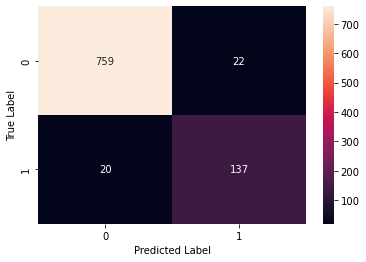

In [109]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()